In [1]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np 
import numpyro
import pandas as pd

from modeller import Modeller

import seaborn as sns
import matplotlib.pyplot as plt 

from smoother import Smoother

In [56]:
from datetime import datetime

In [57]:
datetime(2019, 12, 31)

datetime.datetime(2019, 12, 31, 0, 0)

# Data File

In [44]:
data_folder = "../2024 bayer/"

In [85]:
data = pd.read_excel(data_folder + 'data_from 2019.xlsx', index_col='date')

time_filter = (data.index > datetime(2019, 12, 31)) & (data.index < datetime(2024, 7, 1))
data = data[time_filter]

print(len(data))
data.tail()


54


,Volume,Value,Price index,Category volume,Distribution,Shelf share,Recepts,TV Theraflex,TV Competitors,Digital
date,,,,,,,,,,
2024-02-01,79231,2.217593e+08,1.107465,314560,2.753839,0.433968,0.224490,0.0,50777746.13,NaN
2024-03-01,92354,2.613737e+08,1.122735,362847,2.711260,0.432939,0.282561,0.0,49905428.75,NaN
2024-04-01,86991,2.532007e+08,1.131310,358567,2.591556,0.425772,0.253488,0.0,50983088.02,NaN
2024-05-01,91228,2.690149e+08,1.145944,330837,2.707355,0.425960,0.263298,0.0,26417334.69,NaN
2024-06-01,84213,2.451116e+08,1.117679,335139,2.740178,0.417395,0.277473,0.0,27255815.25,NaN


## Additional vars

fitting smoother...


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

... done


<Axes: xlabel='date', ylabel='Category volume'>

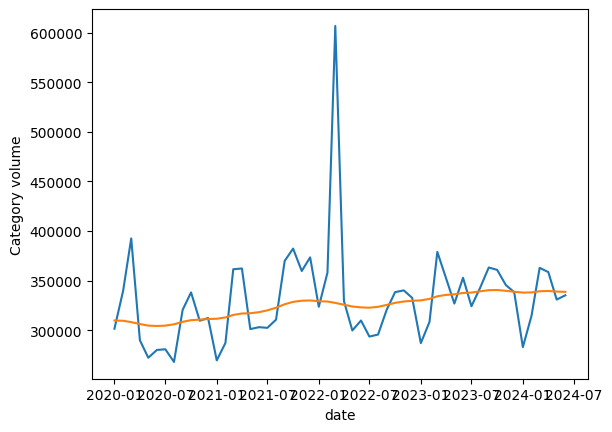

In [89]:
data['Demand'] = Smoother().Smooth(data['Category volume'].values, method='MCMC')

sns.lineplot(data['Category volume'])
sns.lineplot(data['Demand'])

fitting smoother...


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

... done


<Axes: xlabel='date', ylabel='Recepts'>

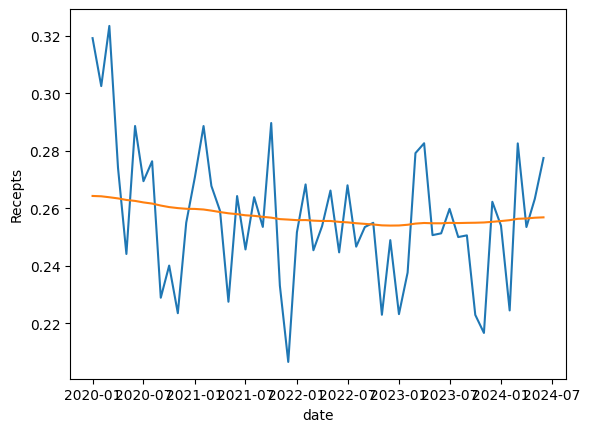

In [86]:
data['Recepts smooth'] = Smoother().Smooth(data['Recepts'].values, method='MCMC')

sns.lineplot(data['Recepts'])
sns.lineplot(data['Recepts smooth'])

# Sales Model

## Model 1

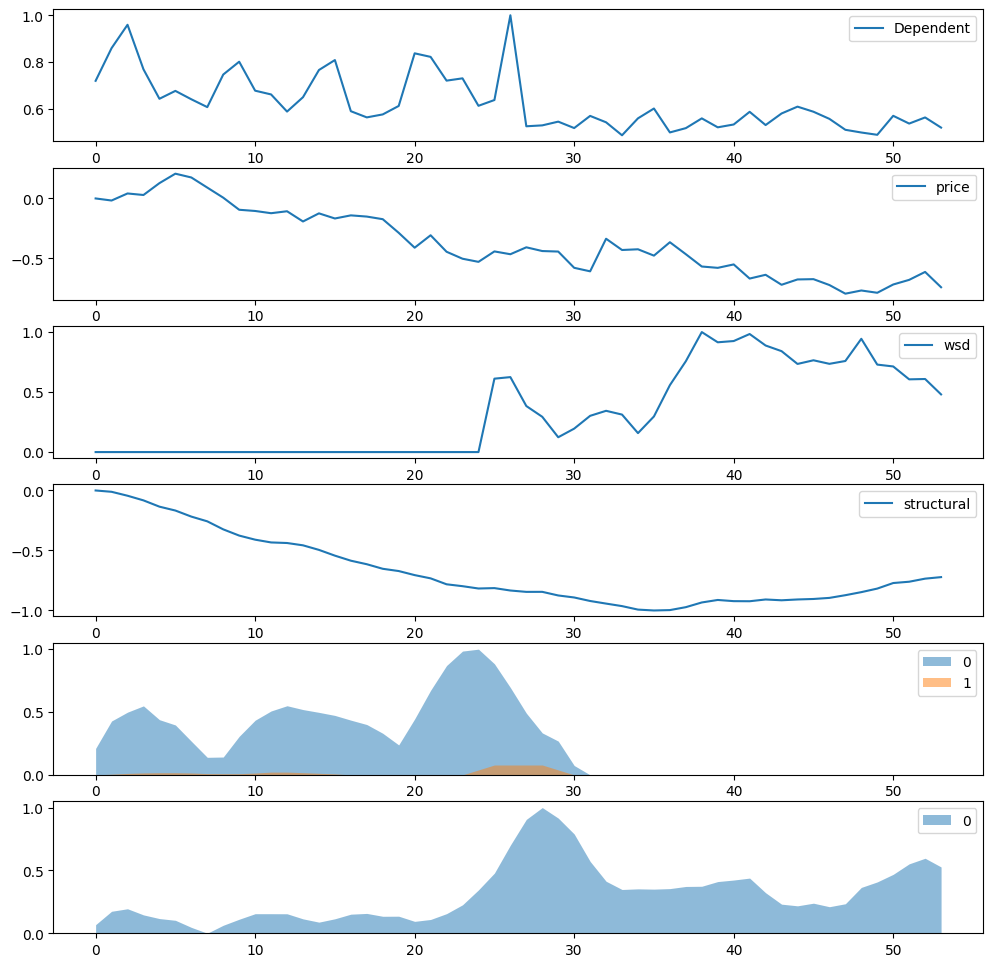

In [97]:
spec = {
    'y': ['Volume'], 
    'X' : {
        'media_own': ['TV Theraflex', 'Digital'],
        'media_competitors': ['TV Competitors'],
        'price': ['Price index'],
        'structural': ['Recepts smooth'],
        'wsd': ['Shelf share']
    }
}
sm1 = Modeller("Sales", seasonality_period=12, seasonality_model='fourier', seasonality_num_fouries_terms=4).PrepNoFit(data, spec)
sm1.PlotInputs()

In [98]:
sm1.Fit(data, spec, num_samples=2000)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

In [94]:
sm1.GetDecomposition()

base     media_own              media_competitors  \
                     base  TV Theraflex      Digital    TV Competitors   
date                                                                     
2020-01-01  128035.450577   2132.000511     0.000000       -293.389185   
2020-02-01  136136.758175   4563.243759   103.166277       -954.601999   
2020-03-01  139201.685096   6508.871896   224.636306      -1513.519520   
2020-04-01  131922.360687   8116.149055   344.095518      -1729.926389   
2020-05-01  127092.155763   9084.036768   452.486083      -1801.673359   
2020-06-01  127806.088854   9787.463715   543.576836      -1832.046475   
2020-07-01  127539.778106   9881.637434   608.729775      -1641.558206   
2020-08-01  123086.894965   9268.359934   635.954635      -1332.731304   
2020-09-01  125999.425242   8972.934710   659.516149      -1398.239931   
2020-10-01  129144.683259   9812.229617   684.554137      -1645.569215   
2020-11-01  123215.787361  10879.988080   741.769186      -2010.053388   
2020-12-01  121647.570824  11881.068188   838.849666      -2278.608197   
2021-01-01  120536.920363  12763.844628   919.913913      -2489.719498   
2021-02-01  122247.242599  13396.261524   962.274470      -2492.391997   
2021-03-01  126074.094872  13881.354914   971.759476      -2411.648588   
2021-04-01  128353.621129  14250.198965   952.030996      -2490.849290   
2021-05-01  119830.664491  14487.086002   820.122959      -2715.784375   
2021-06-01  114274.055818  14622.888859   725.745721      -2912.855486   
2021-07-01  116398.166625  14535.738927   653.250379      -2974.357023   
2021-08-01  116598.063647  14074.563304   594.984429      -3044.215129   
2021-09-01  123729.215811  14666.749551   546.710248      -2937.311550   
2021-10-01  123437.442931  15656.288514   505.842103      -2945.747087   
2021-11-01  117123.461228  16738.672633   470.680597      -3160.468687   
2021-12-01  116566.072022  17725.922175   440.043757      -3620.971288   
2022-01-01  112453.146915  18528.262632   730.466899      -4468.896736   
2022-02-01  109877.035050  19031.870318  1205.743369      -5666.130801   
2022-03-01  110626.644059  19152.553829  1581.875307      -7512.556689   
2022-04-01  107503.858302  18851.775167  1895.314206      -9768.117559   
2022-05-01  112761.981352  18207.037107  2164.917128     -11881.047693   
2022-06-01  116192.608137  17509.145641  2144.544560     -13182.269911   
2022-07-01  117782.506065  15670.395162  1837.821870     -13763.364699   
2022-08-01  119083.244839  13315.045523  1620.518492     -13435.014117   
2022-09-01  112504.418389  11630.576031  1455.032420     -12695.692436   
2022-10-01  109634.450379  10347.482320  1323.003522     -12008.732085   
2022-11-01  117293.025521   9327.925288  1214.261036     -11608.465449   
2022-12-01  121062.520484   8492.994629  1122.619666     -11345.061386   
2023-01-01  117532.427425   7793.699250  1044.041428     -11195.423140   
2023-02-01  110707.495972   7197.724426   975.744565     -11176.151730   
2023-03-01  101642.793907   6682.714237   915.730429     -11181.808374   
2023-04-01  100670.429826   6232.612592   862.514333     -11362.034935   
2023-05-01  104392.684820   5835.521488   814.963999     -11558.279009   
2023-06-01  103829.045818   5482.398375   772.196856     -11787.379118   
2023-07-01  101011.805639   5166.218860   733.512002     -11479.532062   
2023-08-01   99265.498852   4881.428476   698.344392     -10911.033314   
2023-09-01   92856.275275   4623.564718   666.231982     -10474.263722   
2023-10-01   89998.681475   4388.991516   636.792899     -10251.802815   
2023-11-01   88774.801687   4174.713273   609.708114      -9959.954586   
2023-12-01   85455.783912   3978.235615   584.708667      -9842.938490   
2024-01-01   87873.278271   3797.462920   561.565796     -10300.870465   
2024-02-01   85197.420435   3630.617240   540.083629     -10794.348756   
2024-03-01   84844.268387   3476.181938   520.093611     -11410.425041   
2024-04-01   88500.746207

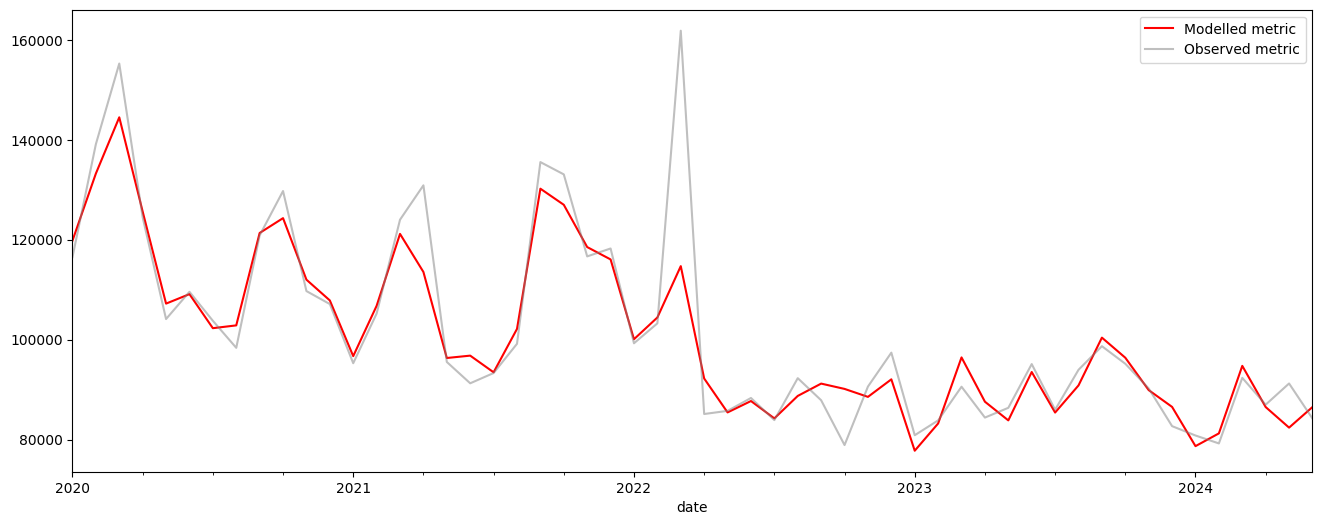

In [99]:
sm1.PlotFit()

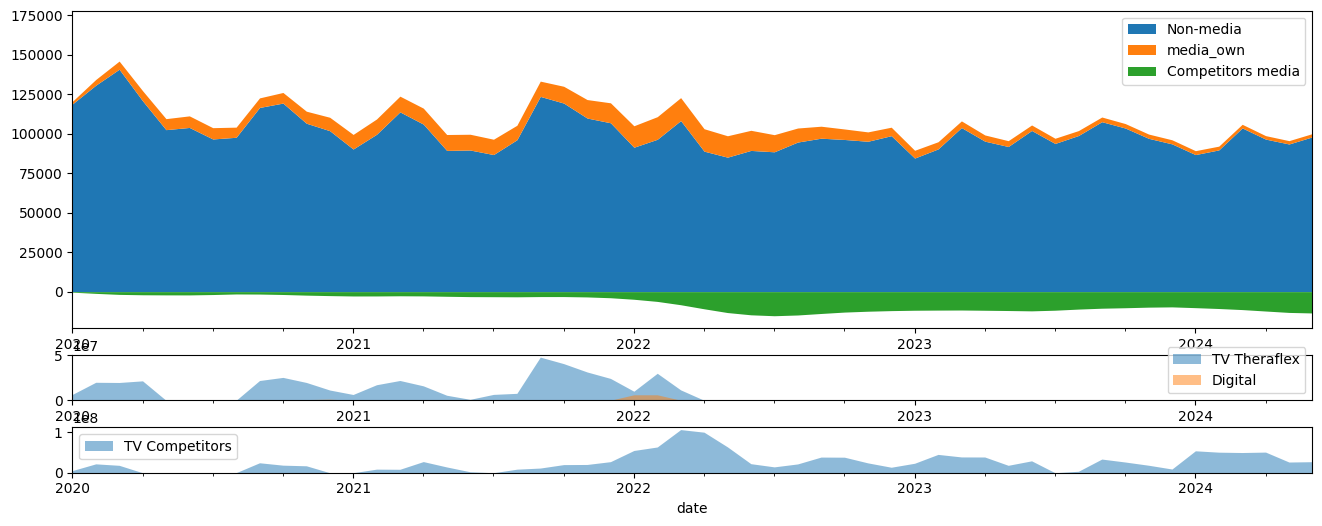

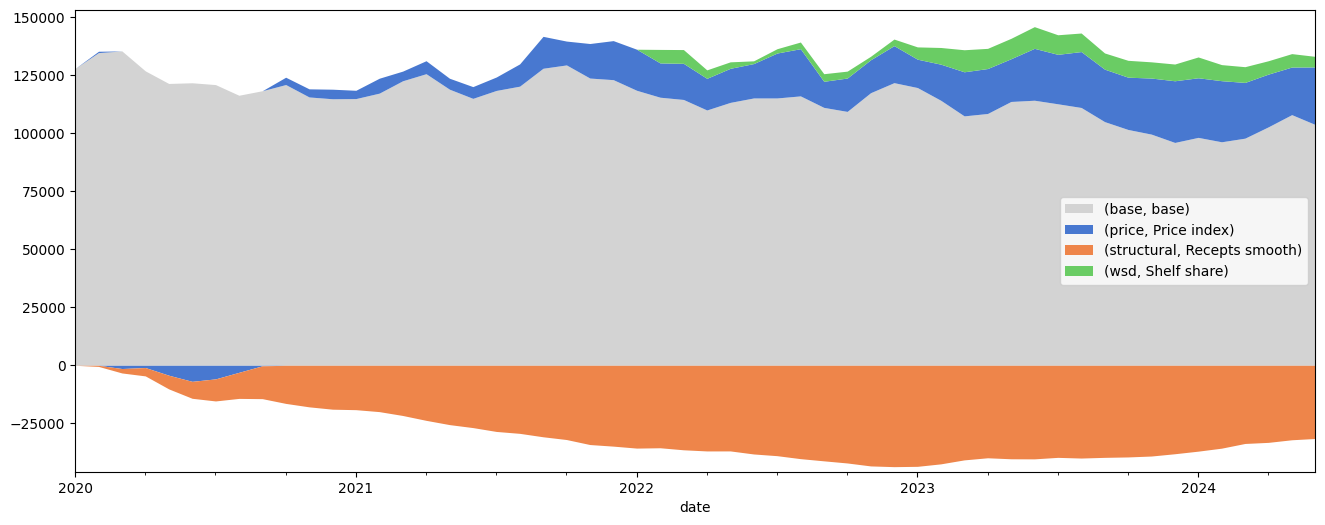

In [100]:
sm1.PlotDecomposition()
sm1.PlotNonmediaDecomposition()

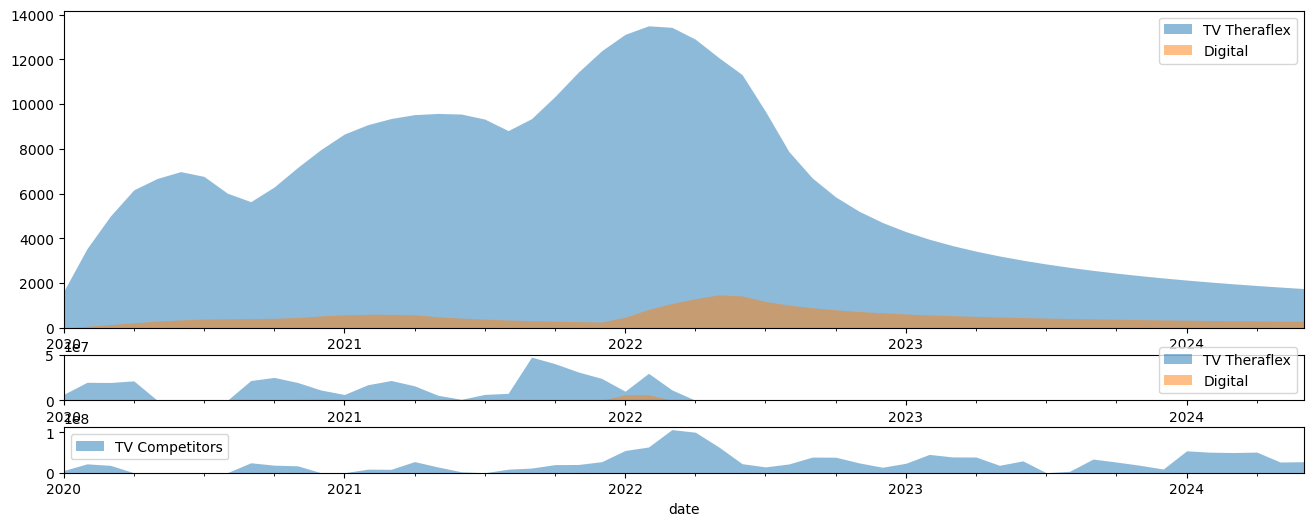

In [101]:
sm1.PlotMediaDecomposition()

## Model 2 no wsd

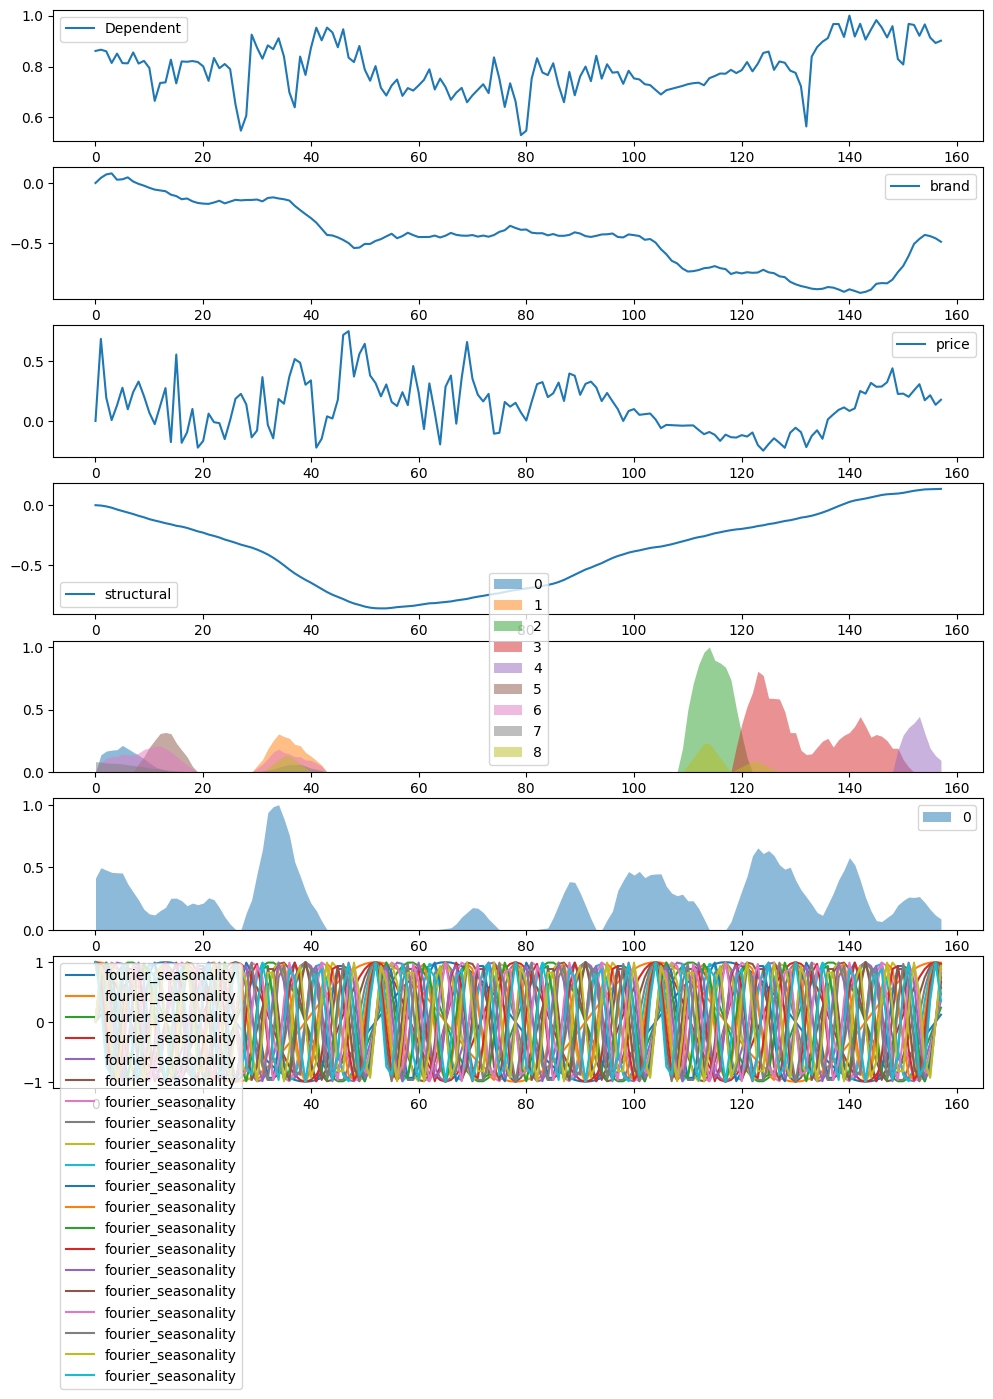

In [34]:
spec = {
    'y': ['Volume'], 
    'X' : {
        'media_own': ['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates', 'TV NCP promo', 'OLV', 'Digital other ', 'OOH'],
        'media_competitors': ['CompetsMedia'],
        'price': ['PriceIndex'],
        'brand': ['Brand modeled'],
        'structural': ['Demand'],
        #'wsd': ['CWSD']
    }
}
sm1 = Modeller("Sales", seasonality_period=52, seasonality_model='fourier', seasonality_num_fouries_terms=10).PrepNoFit(data, spec)
sm1.PlotInputs()

In [35]:
sm1 = Modeller("Sales", seasonality_period=52, seasonality_model='fourier', seasonality_num_fouries_terms=10).Fit(data, spec)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

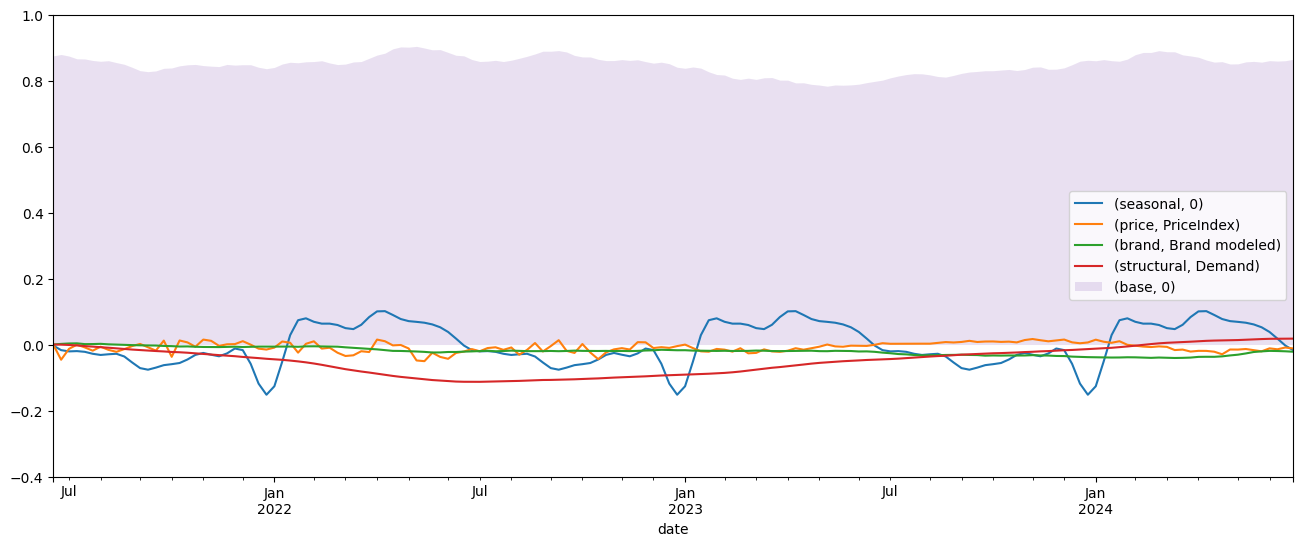

In [57]:
#sm1.PlotFit()
#sm1.PlotDecomposition()
sm1.PlotNonmediaDecomposition()
#sm1.PlotMediaDecomposition()

## Model 3 long / short price

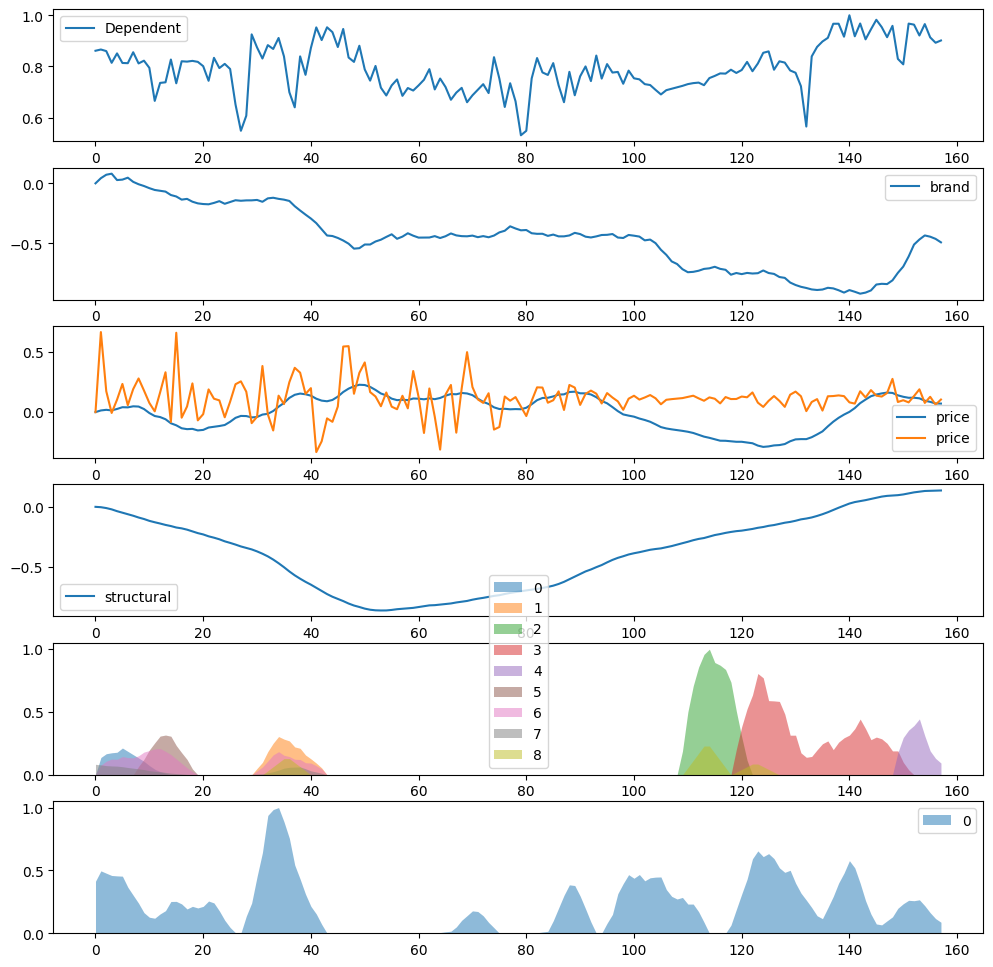

In [139]:
spec = {
    'y': ['Volume'], 
    'X' : {
        'media_own': ['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates', 'TV NCP promo', 'OLV', 'Digital other ', 'OOH'],
        'media_competitors': ['CompetsMedia'],
        'price': ['LongPriceIndex', 'ShortPriceIndex'],
        'brand': ['Brand modeled'],
        'structural': ['Demand'],
        #'wsd': ['CWSD']
    }
}
sm1 = Modeller("Sales", seasonality_period=52, seasonality_model='fourier', seasonality_num_fouries_terms=10).PrepNoFit(data, spec)
sm1.PlotInputs()

In [140]:
sm3 = Modeller("Sales", seasonality_period=52, seasonality_model='fourier', seasonality_num_fouries_terms=10).Fit(data, spec)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

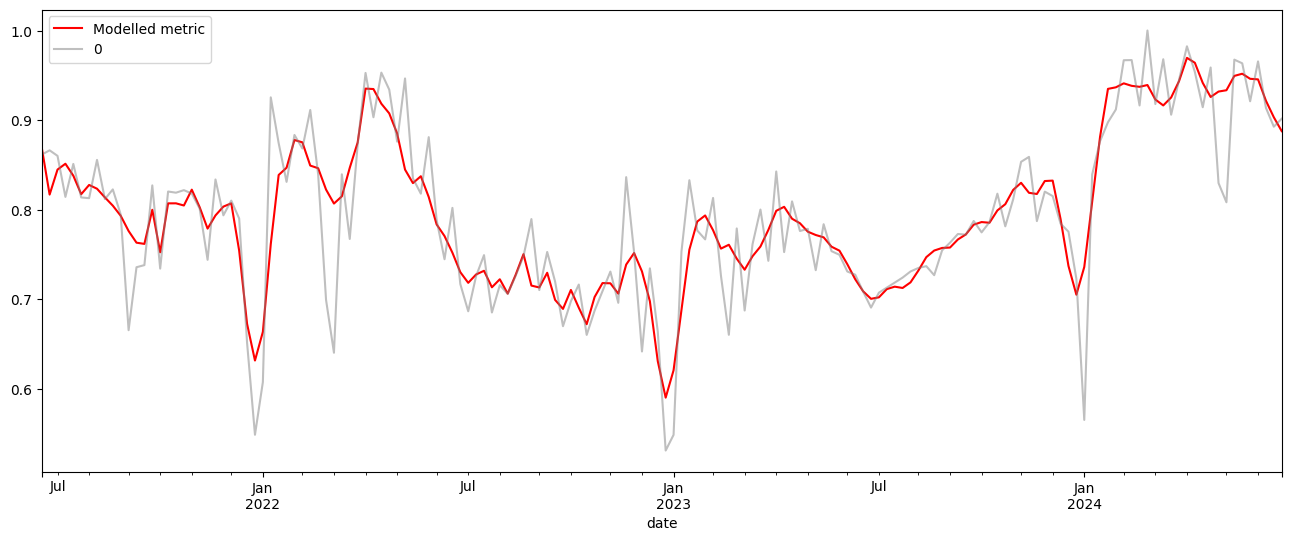

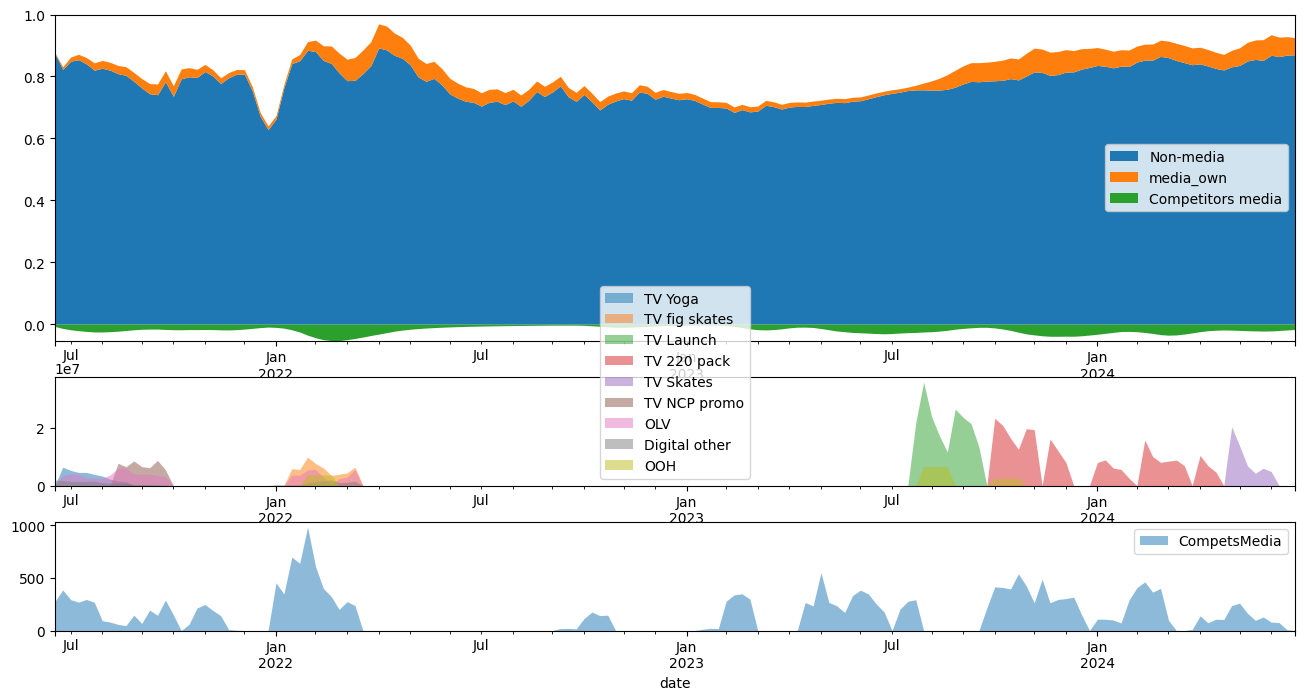

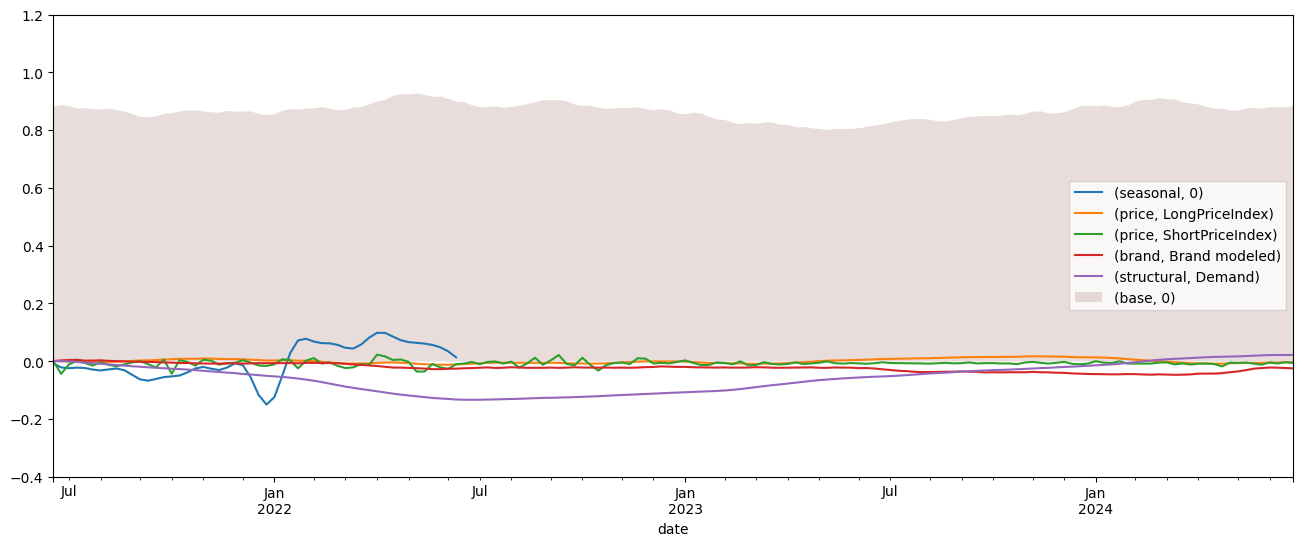

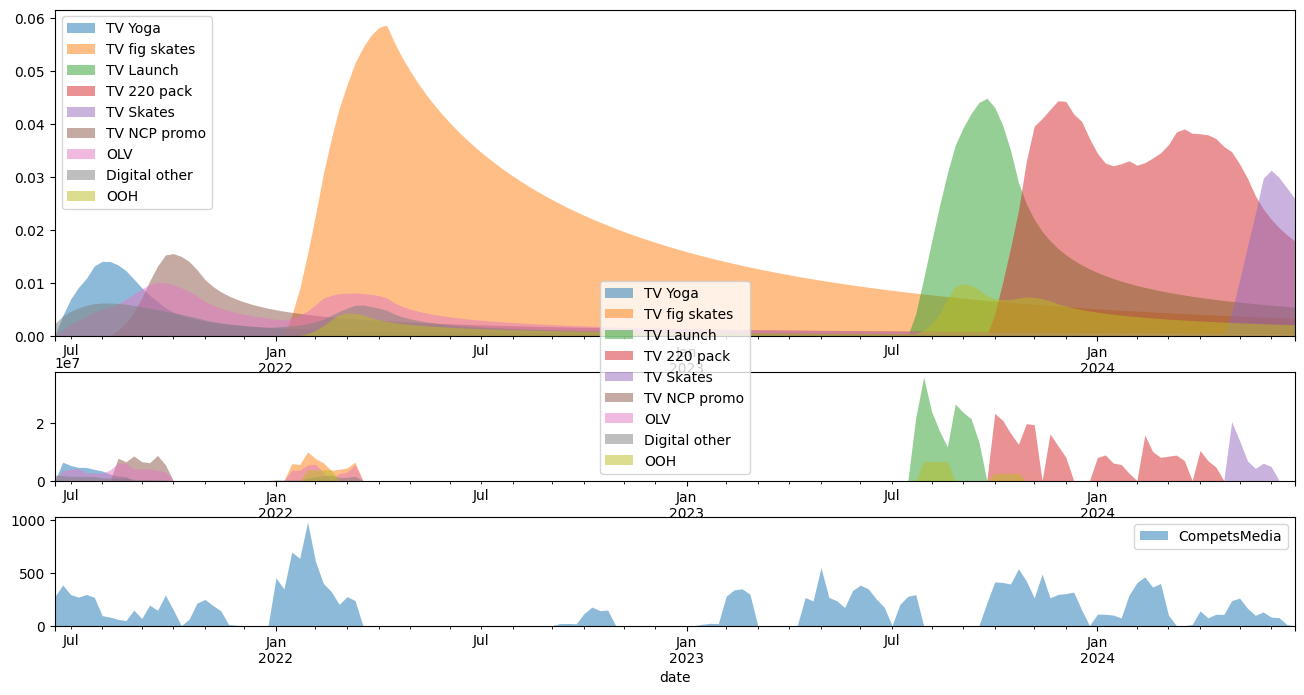

In [141]:
sm3.PlotFit()
sm3.PlotDecomposition()
sm3.PlotNonmediaDecomposition()
sm3.PlotMediaDecomposition()

<Axes: ylabel='Count'>

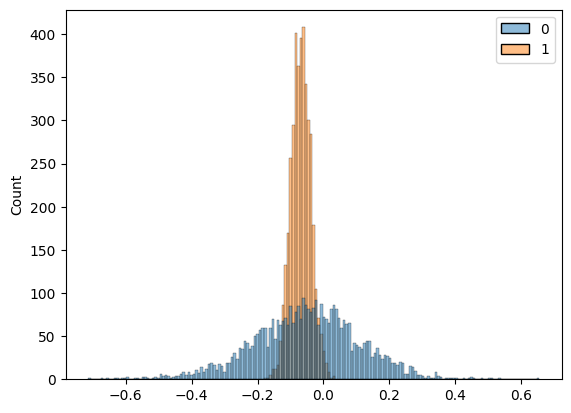

In [68]:
sns.histplot(sm3.GetSamples()['price_beta'])

## Model 4 long / short price + WSD

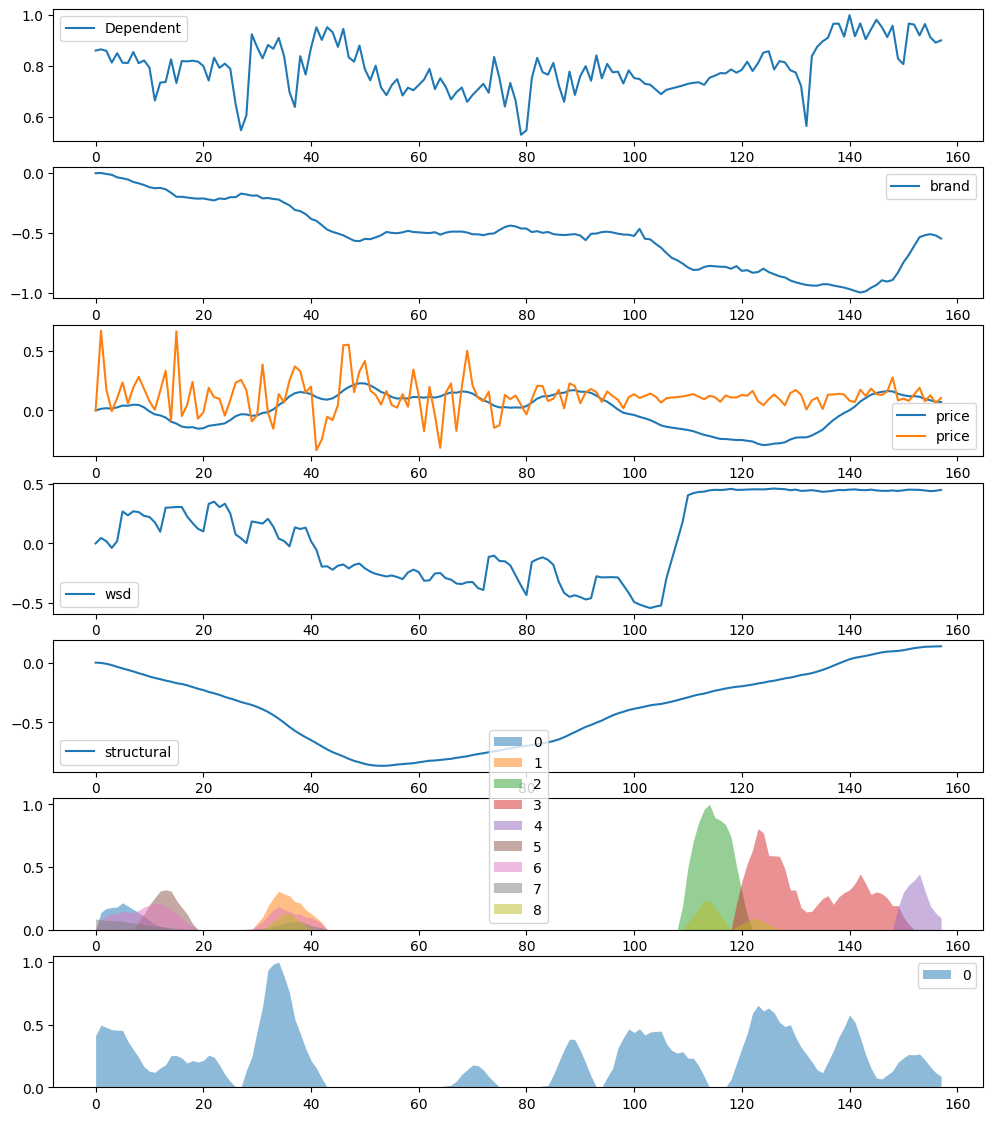

In [22]:
spec = {
    'y': ['Volume'], 
    'X' : {
        'media_own': ['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates', 'TV NCP promo', 'OLV', 'Digital other ', 'OOH'],
        'media_competitors': ['CompetsMedia'],
        'brand': ['Brand modeled'],
        'structural': ['Demand'],
        'wsd': ['WSD'],
        'price': ['LongPriceIndex', 'ShortPriceIndex'],
    }
}
sm1 = Modeller("Sales", seasonality_period=52, seasonality_model='fourier', seasonality_num_fouries_terms=10).PrepNoFit(data, spec)
sm1.PlotInputs()

In [23]:
sm4 = Modeller("Sales", seasonality_period=52, seasonality_model='fourier', seasonality_num_fouries_terms=10).Fit(data, spec, num_samples=3000)

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

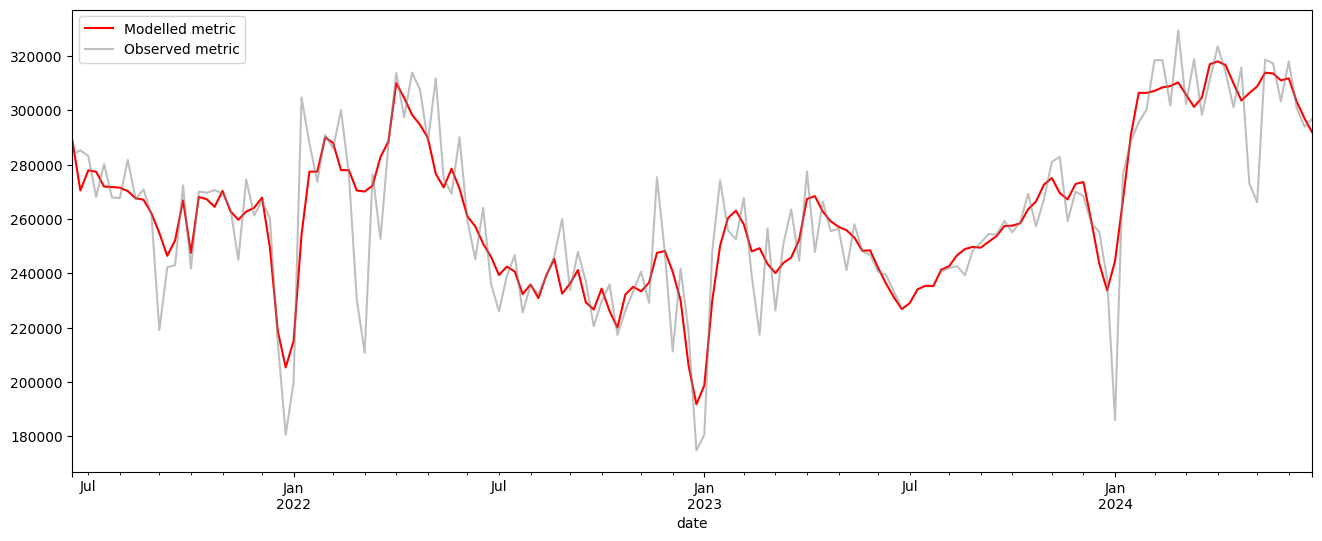

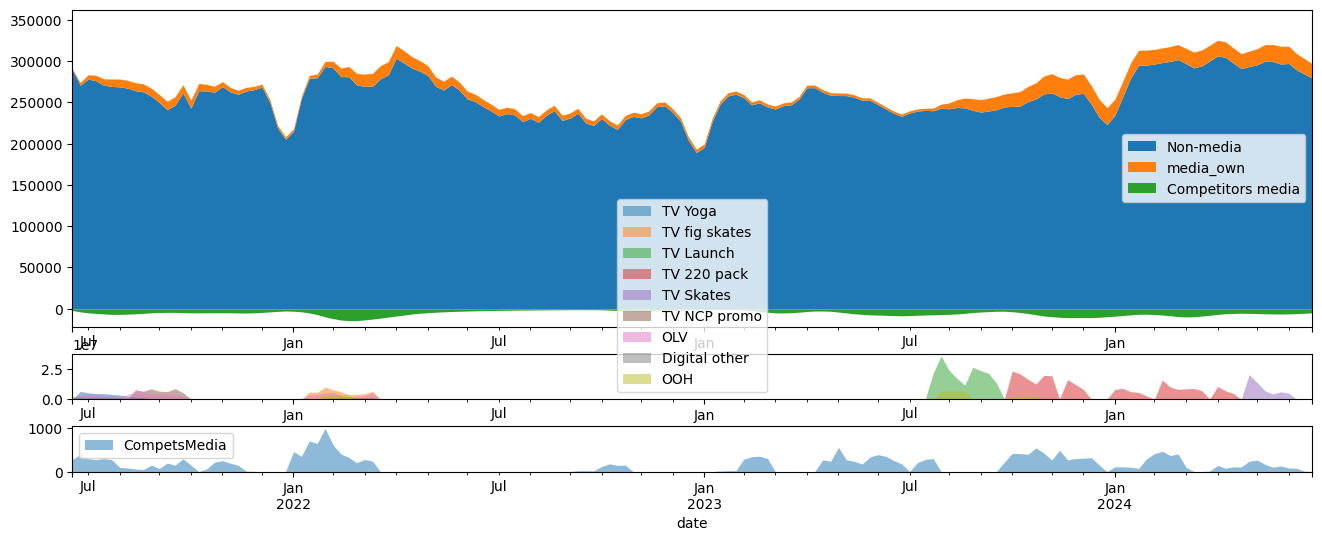

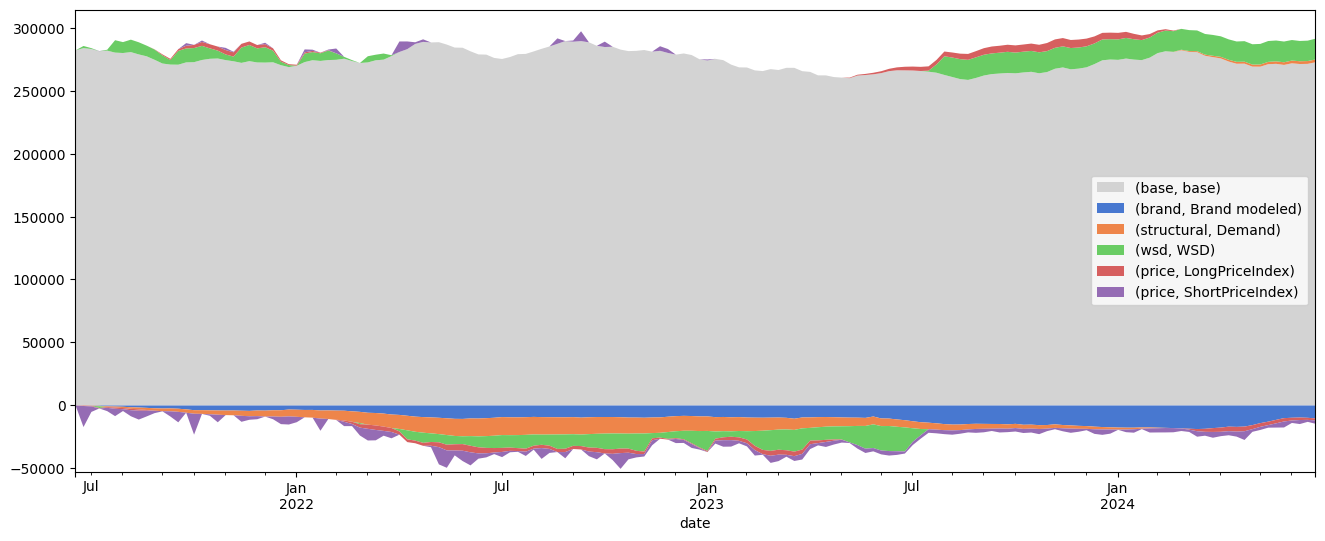

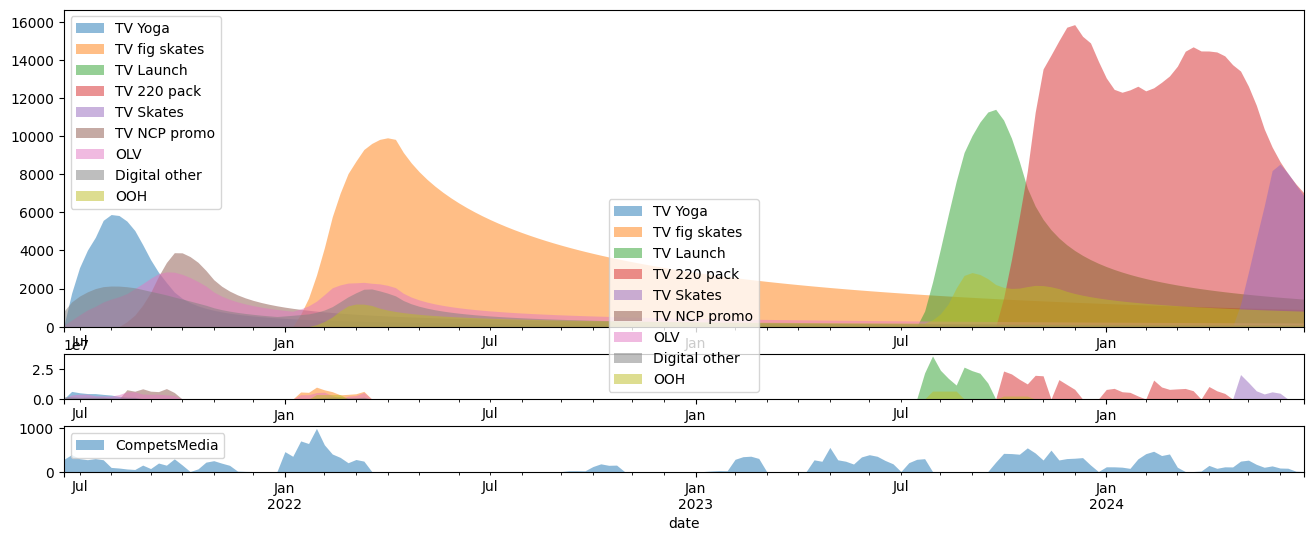

In [25]:
sm4.PlotFit()
sm4.PlotDecomposition()
sm4.PlotNonmediaDecomposition()
sm4.PlotMediaDecomposition()

In [69]:
sm4.decomposition.to_excel(data_folder + "decomp.xlsx")

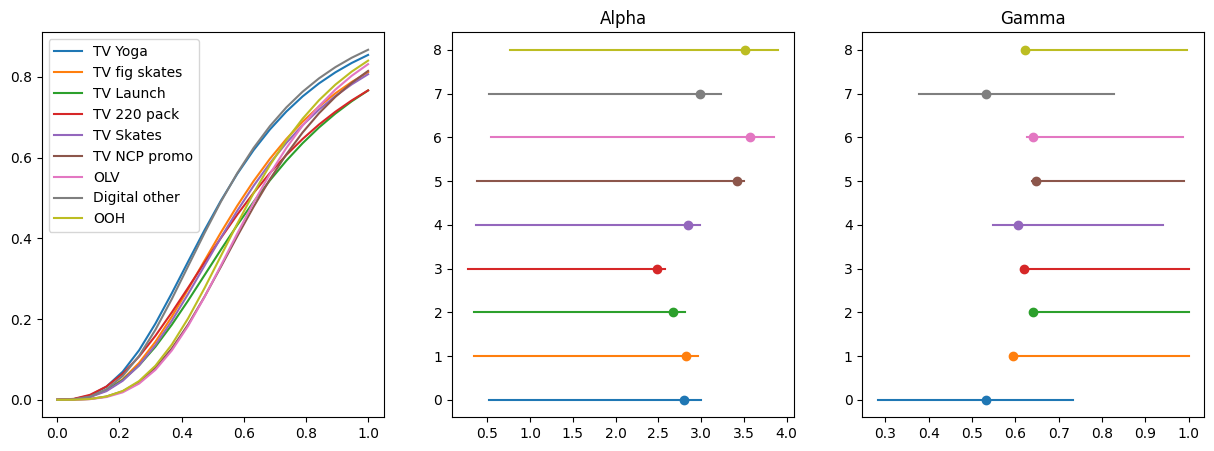

In [26]:
sm4.PlotDiminishingReturnCurves()

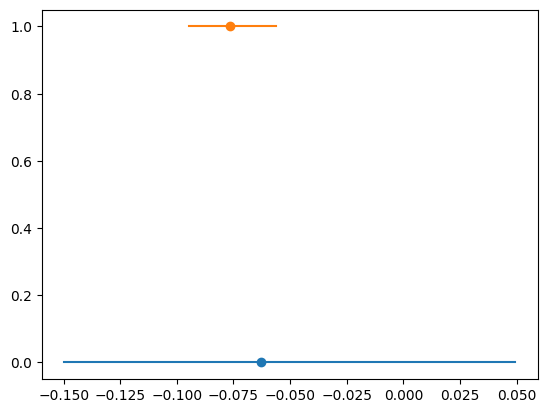

In [27]:
sm4.PlotSiteIntervals('price_beta')

In [48]:
test = sm4.GetDecomposition()

## Model 5 long / short price + WSD

In [9]:
data.columns

Index(['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates',
       'TV NCP promo', 'OLV', 'Digital other ', 'OOH', 'Radio', 'CWSD', 'WSD',
       'ShelfShare', 'Volume', 'Price', 'PriceIndex', 'Brand', 'Category',
       'CompetsMedia', 'PromoPercent', 'Digital', 'OOH old', 'OOH new',
       'Brand modeled', 'Demand', 'LongPriceIndex', 'ShortPriceIndex'],
      dtype='object')

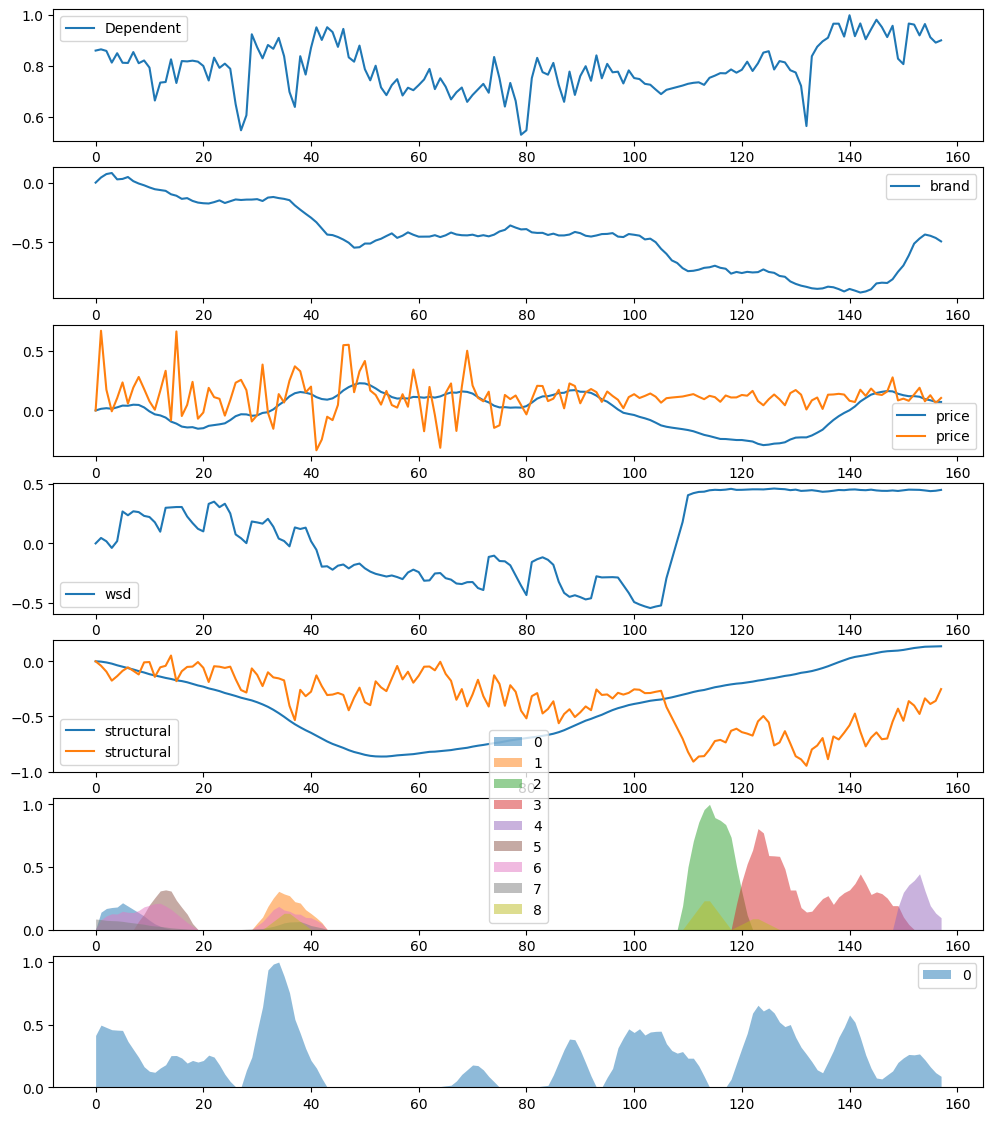

In [111]:
spec = {
    'y': ['Volume'], 
    'X' : {
        'media_own': ['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates', 'TV NCP promo', 'OLV', 'Digital other ', 'OOH'],
        'media_competitors': ['CompetsMedia'],
        'price': ['LongPriceIndex', 'ShortPriceIndex'],
        'brand': ['Brand modeled'],
        'structural': ['Demand', 'PromoPercent'],
        #'wsd': ['CWSD']
        'wsd': ['WSD']
    }
}
sm5 = Modeller("Sales", seasonality_period=52, seasonality_model='fourier', seasonality_num_fouries_terms=10).PrepNoFit(data, spec)
sm5.PlotInputs()

In [112]:
sm5 = Modeller("Sales", seasonality_period=52, seasonality_model='fourier', seasonality_num_fouries_terms=10).Fit(data, spec, num_samples=3000)

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

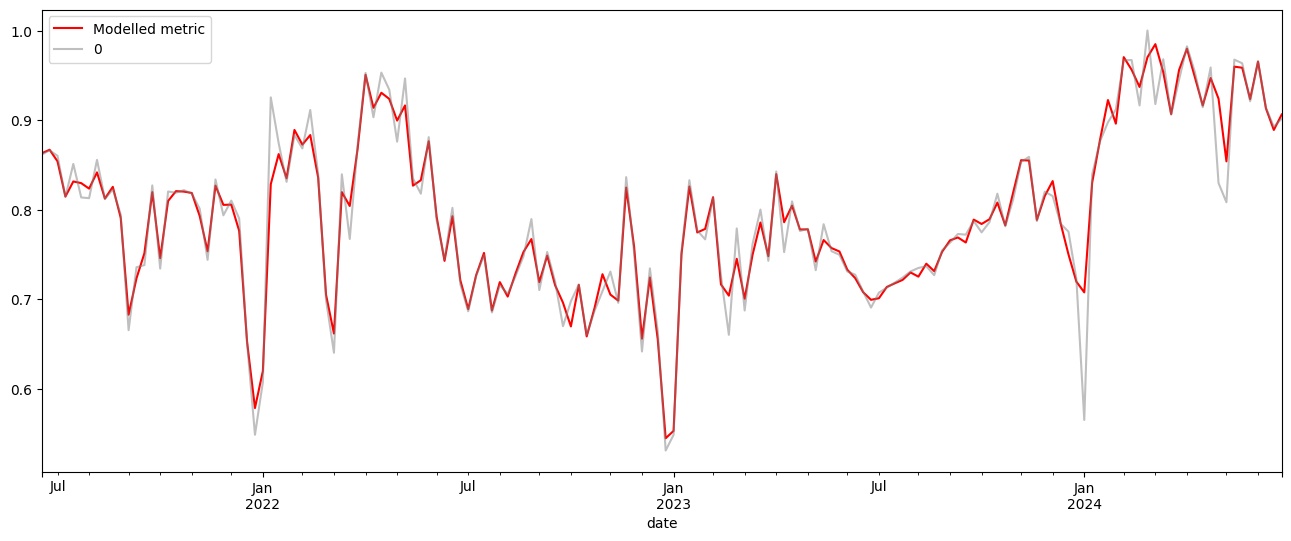

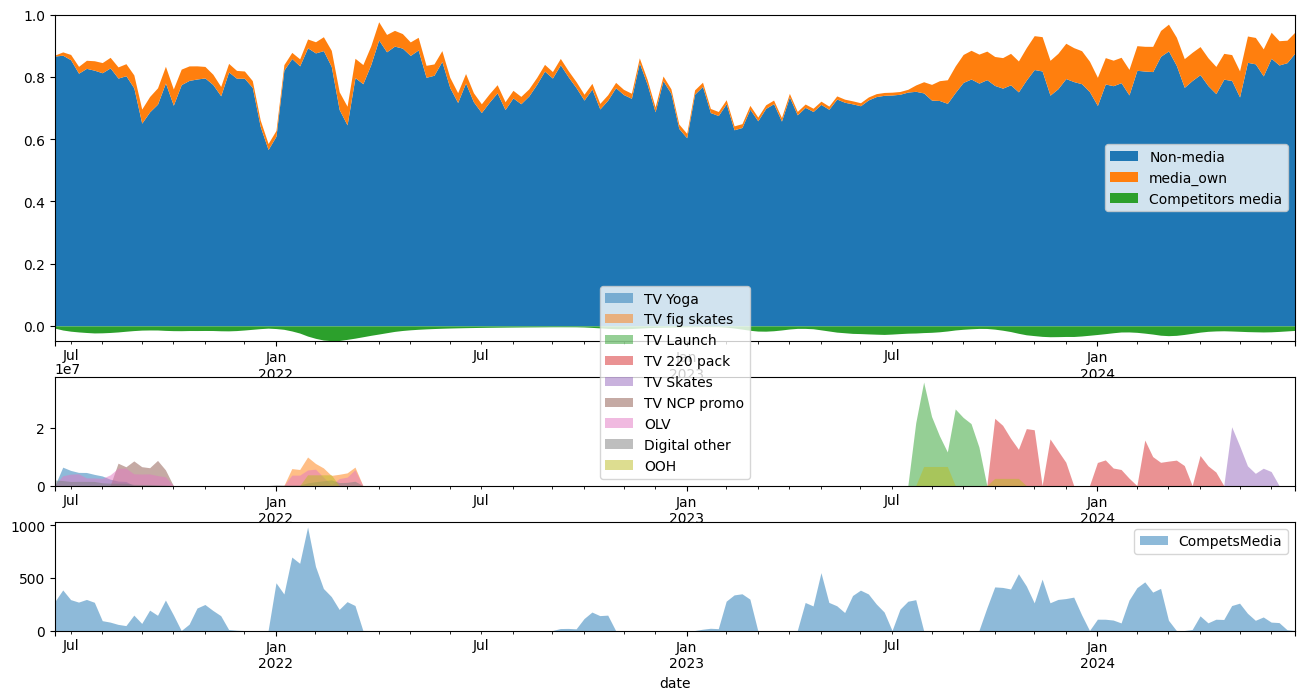

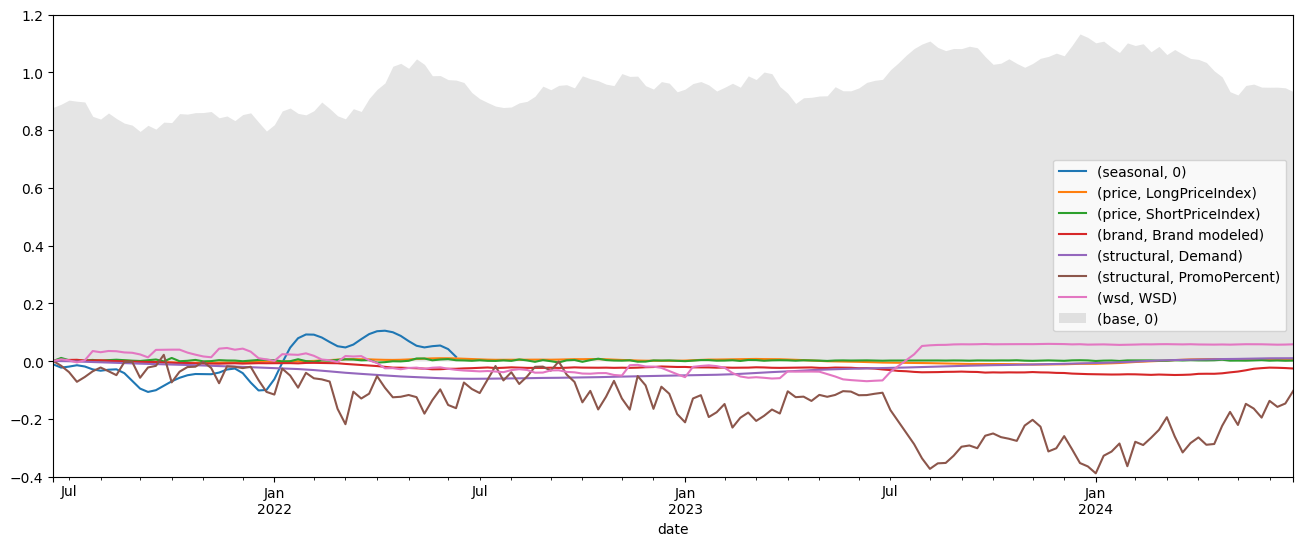

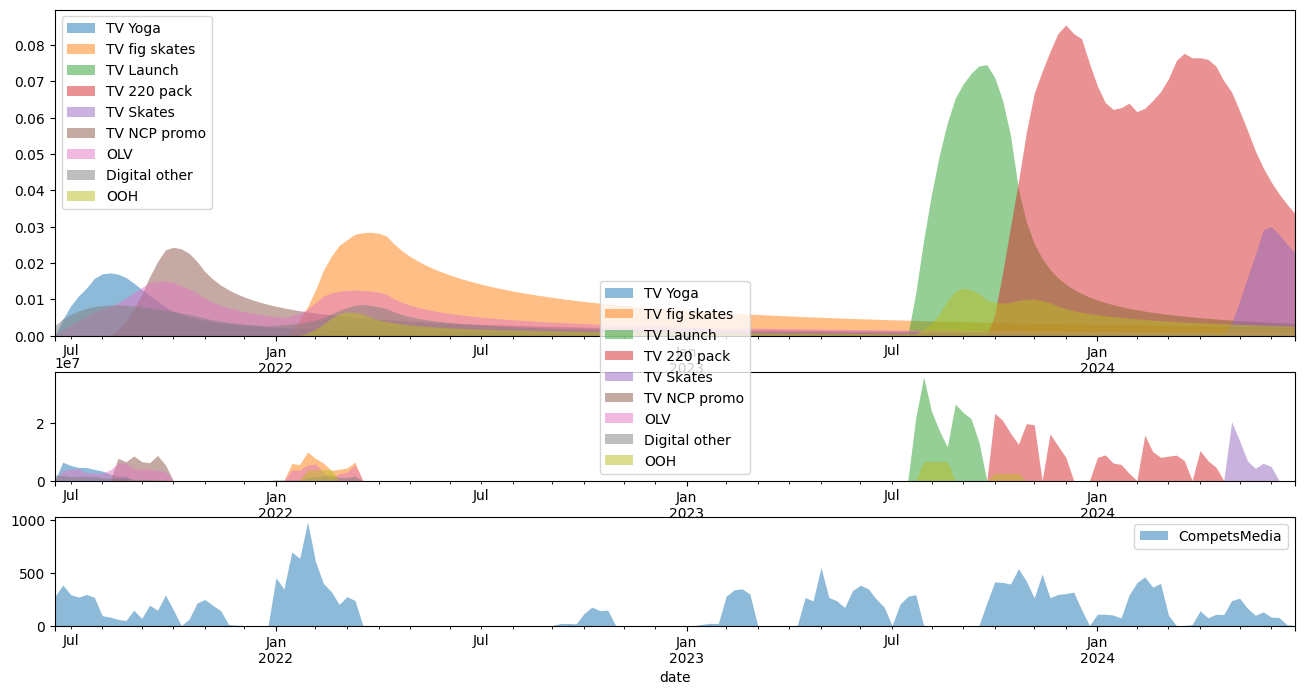

In [113]:
sm5.PlotFit()
sm5.PlotDecomposition()
sm5.PlotNonmediaDecomposition()
sm5.PlotMediaDecomposition()

(0.0, 10.0)

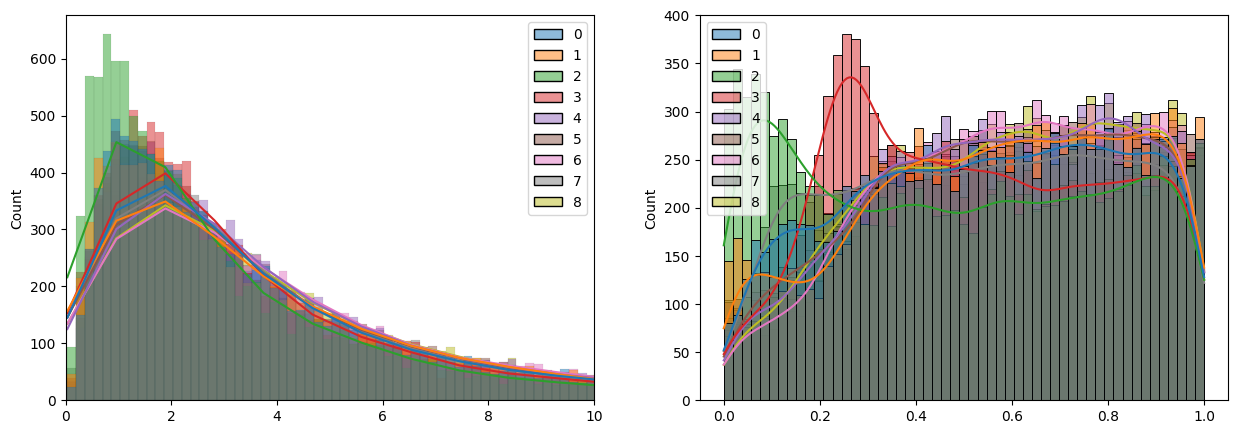

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(sm5.GetSamples()['alpha'], ax=ax[0], kde=True)
sns.histplot(sm5.GetSamples()['gamma'], ax=ax[1], kde=True)

ax[0].set_xlim(0,10)

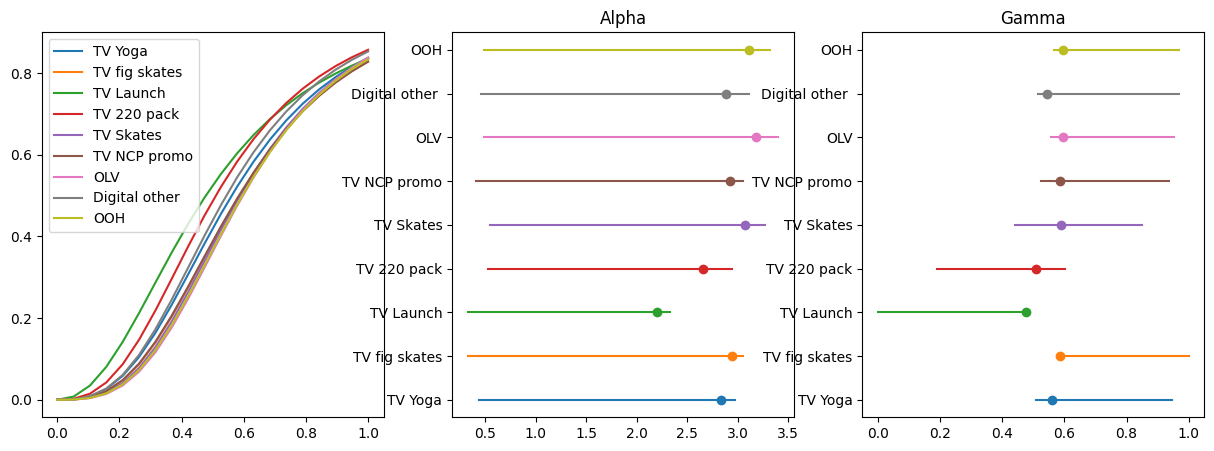

In [115]:
sm5.PlotDiminishingReturnCurves()

In [119]:
sm5.SitesNames()

dict_keys(['alpha', 'base', 'base_drift_scale', 'base_init', 'brand', 'brand_beta', 'comp_media_beta', 'comp_media_retention', 'gamma', 'media', 'media_beta', 'media_retention', 'noise_scale', 'price', 'price_beta', 'seasonal', 'seasonality_betas', 'structural', 'structural_beta', 'wsd', 'wsd_beta'])

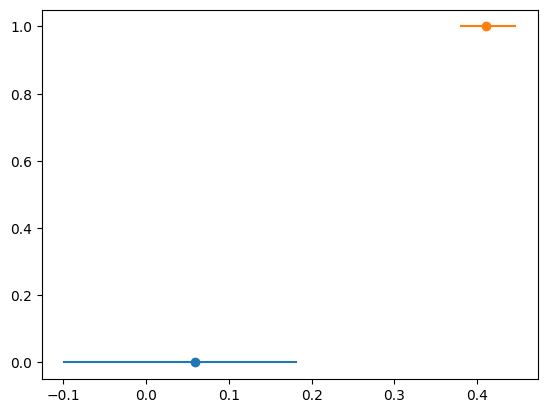

In [133]:
sm5.PlotSiteIntervals('structural_beta')